In [2]:
import utils
import json
import importlib

In [3]:
'''
with open('data/data.json', 'r') as file:
    data = json.load(file)
model = "[24,8]_.001"
selector = "300R"

run_vals = data[model][selector]['vals']
run_times = data[model][selector]['times']
'''

'\nwith open(\'data/data.json\', \'r\') as file:\n    data = json.load(file)\nmodel = "[24,8]_.001"\nselector = "300R"\n\nrun_vals = data[model][selector][\'vals\']\nrun_times = data[model][selector][\'times\']\n'

### Single Arch (in depth):

In [4]:
importlib.reload(utils)

# utils.plot_single2(
#     ("[8]_(0.001,0.0001)_(100,20,0)_25", "vals"), "time"
# )

<module 'utils' from '/home/wpatty/thesis/utils.py'>

### Archs Comparison

| Model                       | Params   | FLOPs/input   | μs/input (sim)   | μs/input (dset)   |
|-----------------------------|----------|---------------|------------------|-------------------|
| ReLU [8]                    | 81       | 152           | 3.4141           | 3.5525            |
| ReLU [24, 8]                | 425      | 816           | 8.0478           | 8.0016            |
| ReLU [24, 48, 24, 8]        | 2.8 K    | 5496          | 14.4401          | 14.5342           |
| ReLU [8, 48, 192, 48, 8]    | 19.58 K  | 38848         | 17.064           | 17.1816           |
| ReLU [24, 48, 96, 24, 8]    | 8.66 K   | 17112         | 18.0665          | 18.1228           |
| BSpline [8]                 | 105      | 3024          | 28.7476          | 27.8772           |
| BSpline [24, 8]             | 521      | 12304         | 60.9583          | 59.9963           |
| BSpline [24, 48, 24, 8]     | 3.11 K   | 42832         | 115.945          | 114.511           |
| BSpline [24, 48, 96, 24, 8] | 9.26 K   | 88912         | 148.362          | 147.978           |
| LSpline [8]                 | 129      | 144           | 13.0892          | 13.0519           |
| LSpline [24, 8]             | 617      | 784           | 28.843           | 28.8996           |
| LSpline [24, 48, 24, 8]     | 3.42 K   | 5392          | 58.0655          | 60.4286           |
| LSpline [24, 48, 96, 24, 8] | 9.86 K   | 16912         | 74.9301          | 79.5207           |


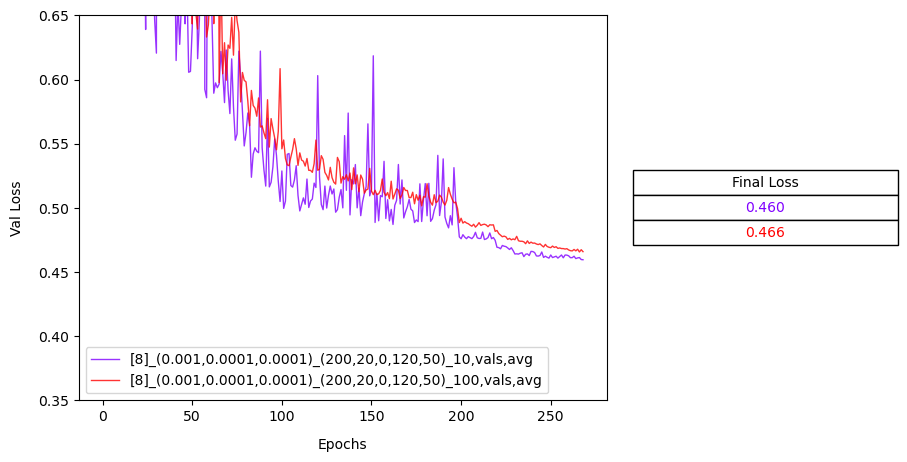

In [32]:
import importlib, utils
importlib.reload(utils)
utils.plot_multiple2(
    model_paths=[

        #* New
        # ("", "model", "vals", "avg"),
        # ("", "model", "vals", "avg"),
        # ("", "model", "vals", "avg"),# ("", "model", "vals", "avg"),
        ("", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_10", "vals", "avg"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_10", "cr_vals", "avg"),
        
        

        # ~~~~~~~~~~~~~~~
        # ~ ReLU
        # ~~~~~~~~~~~~~~~

        # ("R", "[24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("R", "[8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("R", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),

        #? 521, 28fwd param LSpline vs 8.66k, 18fwd param relu
        # ("R", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"), # bspline
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"), # pretraining

        # ~~~~~~~~~~~~~~~
        # ~ BSpline --> Linear
        # ~~~~~~~~~~~~~~~

        #? Need 200-250 epochs on BSpline before switch on [8] and [24, 8]
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,300,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,300,0,50)_100", "vals", "avg"),

        #? but on [24,48,24,8], we don't see the result on 200 epochs
        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        # ("B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,300,0,50)_100", "vals", "avg"),
        
        # ~~~~~~~~~~~~~~~
        #~ ReLU --> BSpline --> Linear
        # ~~~~~~~~~~~~~~~

        #? pretrain on 200 epochs > 150 for smaller networks
        ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),

        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),   

        #? pretrain on 200 epochs < 150 for larger networks...?
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),       

        #? 4% improvement over ReLU
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),

        #? 8% improvement over ReLU
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),
        # ("R->B->L/24,48,96,48,24,8", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,96,48,24,8", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),

        #? With 19% of the parameters, we outperform ReLU using strategically implemented splines:
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"), # 250 epochs on ReLU


        # ~~~~~~~~~~~~~~~
        #~ ReLU --> BSpline --> Both --> Linear
        # ~~~~~~~~~~~~~~~

        #? Looks like we outperform RBL with RB(RB)L in terms of end reachable accuracy - need to run RBL on 200 ReLU epochs
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),
        
        #? But we don't see the same advantage with RB(RB)L on larger models
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        #~ Approach comparisons
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"), # no pretraining
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"), # pretrain
        # ("R->B->RB->L", "[8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"), # no pretraining
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"), # pretrain
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"), # no pretraining
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"), # pretrain
        # ("R->B->RB->L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

    ],
    x="epochs", 
    # xlim = 175,
    xmin=0,
    ylim = .65,
    ymin=.35,
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)